# Long v/s short Trading

In [ ]:
from statsmodels.tsa.stattools import adfuller
import pandas as pd
import numpy as np
import yfinance as yf
import datetime as dt

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
strtDate=dt.datetime(2022,6,1)
endDate=dt.datetime(2023,5,31)

Pair of stationary stocks between 1 Jun 2022 and 31 May 2023:

In [ ]:
tickers=yf.Ticker('AXISBANK.NS IDBI.NS')

In [ ]:
data=yf.download("AXISBANK.NS IDBI.NS", start="2022-06-01", end="2023-05-31")

[*********************100%***********************]  2 of 2 completed


In [ ]:
axisb=yf.Ticker("AXISBANK.NS")
axisb_data=axisb.history(start=strtDate,end=endDate)

In [ ]:
idbi=yf.Ticker("IDBI.NS")
idbi_data=idbi.history(start=strtDate,end=endDate)

Removing time parameter from Date indices of stocks dataframes

In [ ]:
axisb_data['Date'] = pd.to_datetime(axisb_data.index)
axisb_data.index= axisb_data['Date'].dt.date

In [ ]:
idbi_data['Date'] = pd.to_datetime(idbi_data.index)
idbi_data.index= idbi_data['Date'].dt.date

Renaming the Close field to stock_close

In [ ]:
axisb_data.rename(columns = {'Close':'axisb_Close'}, inplace = True)

In [ ]:
idbi_data.rename(columns = {'Close':'idbi_Close'}, inplace = True)

Concatenating the Close fields of both the stocks into a new dataframe

In [ ]:
final1=pd.concat([axisb_data['axisb_Close'],idbi_data['idbi_Close']],axis=1)

Adding a new field of ratio of the close values to this dataframe

In [ ]:
final1['Close_final']=final1['idbi_Close']/final1['axisb_Close']
final1.dropna(inplace=True)

Finding the ADF parameters:

Test Statistic, Critical Value, p-value

In [ ]:
result = adfuller(final1['Close_final'])
print('ADF Test Statistic: %f' % result[0])
print('5%% Critical Value: %f' % result[4]['5%'])
print('p-value: %f' % result[1])

ADF Test Statistic: -2.961229
5% Critical Value: -2.873362
p-value: 0.038677


Since the ADF Test Statistic is more negative than the 5% CV, and also the p-value(0.038) is less than 0.05, Axis Bank and IDBI are a pair of stationary stocks between 1 June 2022 and 31 May 2023.

# Part 2 :Graphs

In [ ]:
final1['std']=final1['Close_final'].std()
final1['mean']=final1['Close_final'].mean()
final1['Z-Score']=(final1['Close_final']-final1['mean'])/final1['std']

In [ ]:
final1['ZSc_mean']=final1['Z-Score'].mean()
final1['ZSc_mean+2Std']=final1['Z-Score'].mean()+2*final1['Z-Score'].std()
final1['ZSc_mean-2Std']=final1['Z-Score'].mean()-2*final1['Z-Score'].std()
final1['ZSc_mean+1.5Std']=final1['Z-Score'].mean()+(1.5)*final1['Z-Score'].std()
final1['ZSc_mean-1.5Std']=final1['Z-Score'].mean()-(1.5)*final1['Z-Score'].std()
final1['ZSc_mean+1Std']=final1['Z-Score'].mean()+1*final1['Z-Score'].std()
final1['ZSc_mean-1Std']=final1['Z-Score'].mean()-1*final1['Z-Score'].std()

In [ ]:
x_axis=final1.index
y_axis=final1['Z-Score']
z=final1['ZSc_mean']
b=final1['ZSc_mean+2Std']
c=final1['ZSc_mean-2Std']
d=final1['ZSc_mean+1.5Std']
e=final1['ZSc_mean-1.5Std']
f=final1['ZSc_mean+1Std']
g=final1['ZSc_mean-1Std']

Text(0, 0.5, 'Z-Scores')

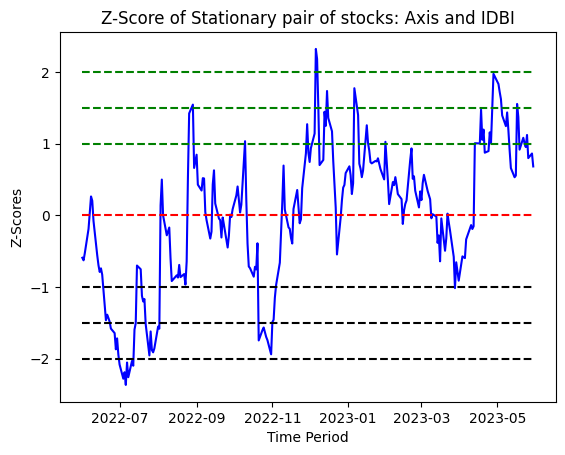

In [ ]:
plt.plot(x_axis,y_axis,color='b',label='Z-Score')
plt.plot(x_axis,z,color='r',linestyle='dashed',label='mean=0')
plt.plot(x_axis,b,color='g',linestyle='dashed',label='mean+2*std=2')
plt.plot(x_axis,c,color='k',linestyle='dashed',label='mean-2*std=-2')
plt.plot(x_axis,d,color='g',linestyle='dashed',label='mean+1.5*std=1.5')
plt.plot(x_axis,e,color='k',linestyle='dashed',label='mean-1.5*std=-1.5')
plt.plot(x_axis,f,color='g',linestyle='dashed',label='mean+1*std=1')
plt.plot(x_axis,g,color='k',linestyle='dashed',label='mean-1*std=-1')
plt.title("Z-Score of Stationary pair of stocks: Axis and IDBI")
#plt.legend()
plt.xlabel("Time Period")
plt.ylabel("Z-Scores")